# Problem Statement

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the Data

df_training = pd.read_csv("Train_Titanic.csv")
df_training.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
# Identify and Explore the Dataset

print("Total Samples in the Data is: ", len(df_training))
print("Number of Passengers Survived is: ", len( df_training [df_training["Survived"] == 1 ]))
print("Number of Passengers who did not Survive is: ", len( df_training [df_training["Survived"] == 0 ]))

survived = df_training [df_training["Survived"] == 1 ]
not_survived = df_training [df_training["Survived"] == 0 ]

print("The Percentage of Passengers survived is {:.2f}% ".format( len(survived) / len(df_training) * 100))
print("The Percentage of Passengers who didn't survive is {:.2f}% ".format( len(not_survived) / len(df_training) * 100))

Total Samples in the Data is:  891
Number of Passengers Survived is:  342
Number of Passengers who did not Survive is:  549
The Percentage of Passengers survived is 38.38% 
The Percentage of Passengers who didn't survive is 61.62% 


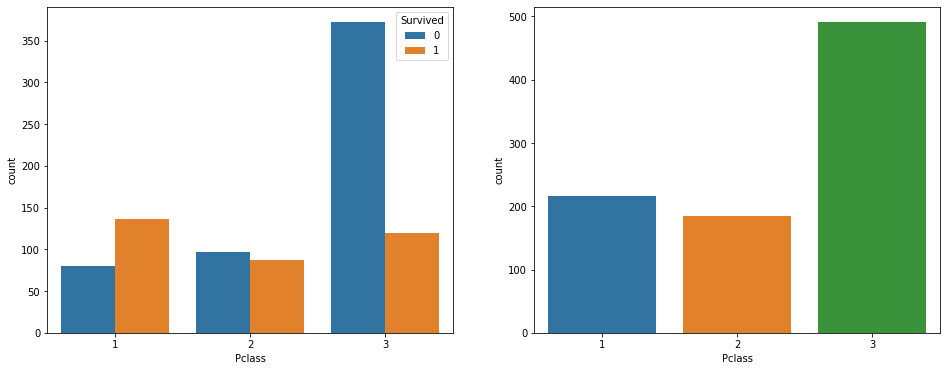

In [4]:
# Visualize PClass using Countplot, and visualize the Survived/Not Survived

plt.figure(figsize= [16, 6])
plt.subplot(121) # 2 Rows, 1st Column, 1st figure
sns.countplot( x= 'Pclass', hue= 'Survived', data= df_training);

plt.subplot(122) # 2 Rows, 1st Column, 1st figure
sns.countplot( x= 'Pclass', data= df_training);

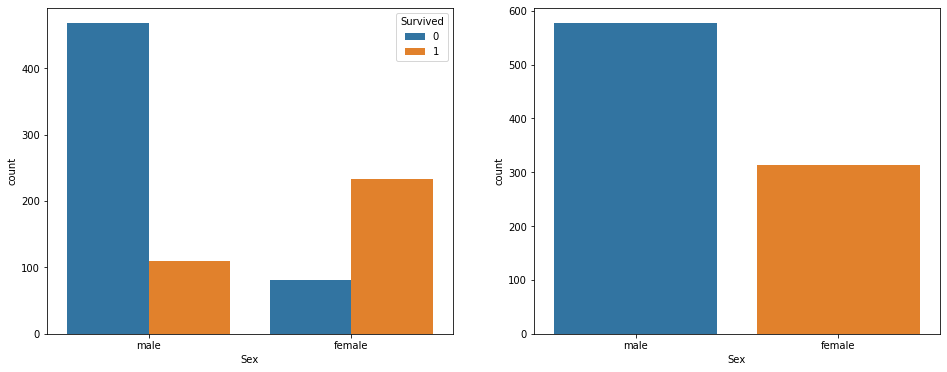

In [5]:
# Visualize Sex using Countplot, and visualize the Survived/Not Survived

plt.figure(figsize= [16, 6])
plt.subplot(121) # 1 Rows, 2 Columns, 1st figure
sns.countplot( x= 'Sex', hue= 'Survived', data= df_training);

plt.subplot(122) # 1 Rows, 2 Columns, 2nd figure
sns.countplot( x= 'Sex', data= df_training);

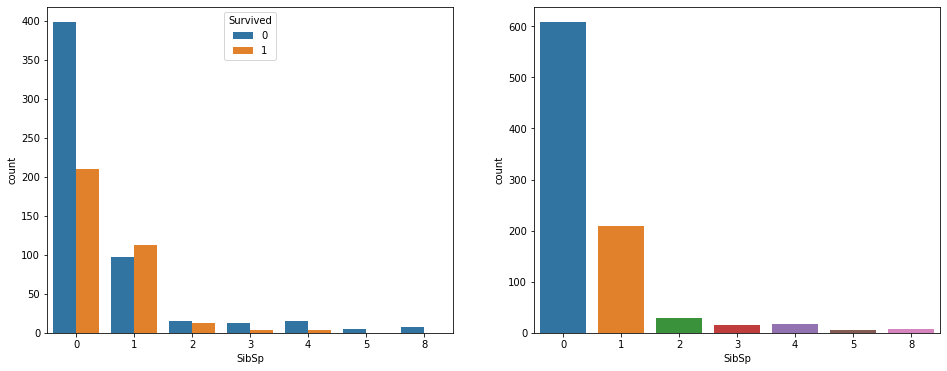

In [6]:
# Visualize Siblings using Countplot, and visualize the Survived/Not Survived

plt.figure(figsize= [16, 6])
plt.subplot(121) # 1 Rows, 2 Columns, 1st figure
sns.countplot( x= 'SibSp', hue= 'Survived', data= df_training);

plt.subplot(122) # 1 Rows, 2 Columns, 2nd figure
sns.countplot( x= 'SibSp', data= df_training);

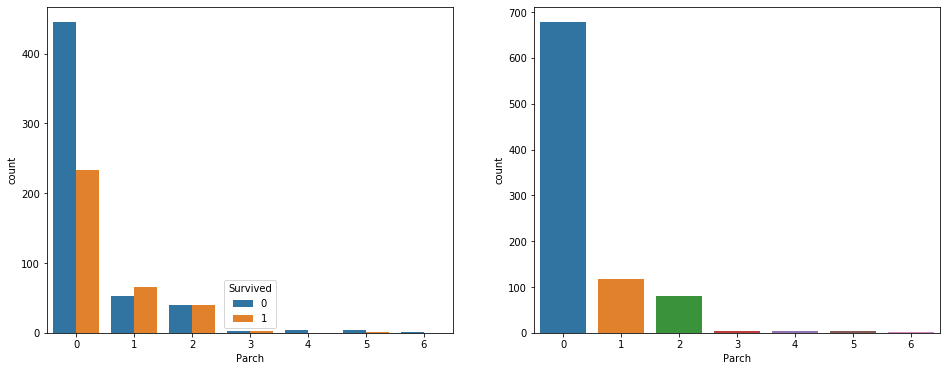

In [7]:
# Visualize Parch using Countplot, and visualize the Survived/Not Survived

plt.figure(figsize= [16, 6])
plt.subplot(121) # 1 Rows, 2 Columns, 1st figure
sns.countplot( x= 'Parch', hue= 'Survived', data= df_training);

plt.subplot(122) # 1 Rows, 2 Columns, 2nd figure
sns.countplot( x= 'Parch', data= df_training);

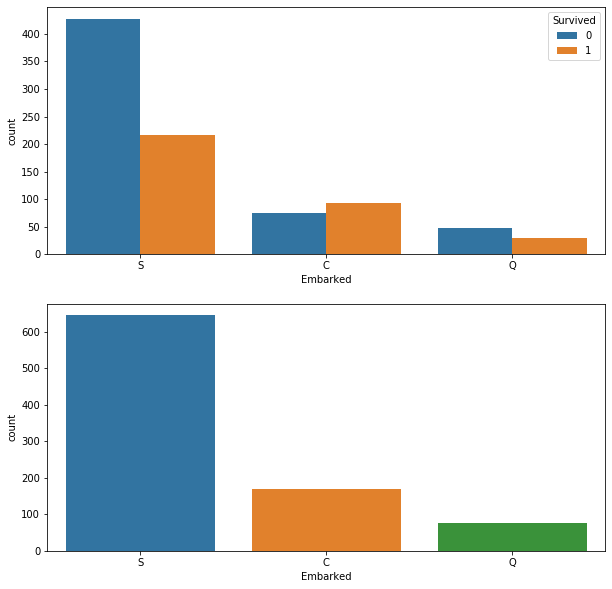

In [8]:
 # Visualize Embarked using Countplot, and visualize the Survived/Not Survived

plt.figure(figsize= [10, 10])
plt.subplot(211) # 2 Rows, 1 Columns, 1st figure
sns.countplot( x= 'Embarked', hue= 'Survived', data= df_training);

plt.subplot(212) # 2 Rows, 1 Columns, 2nd figure
sns.countplot( x= 'Embarked', data= df_training);

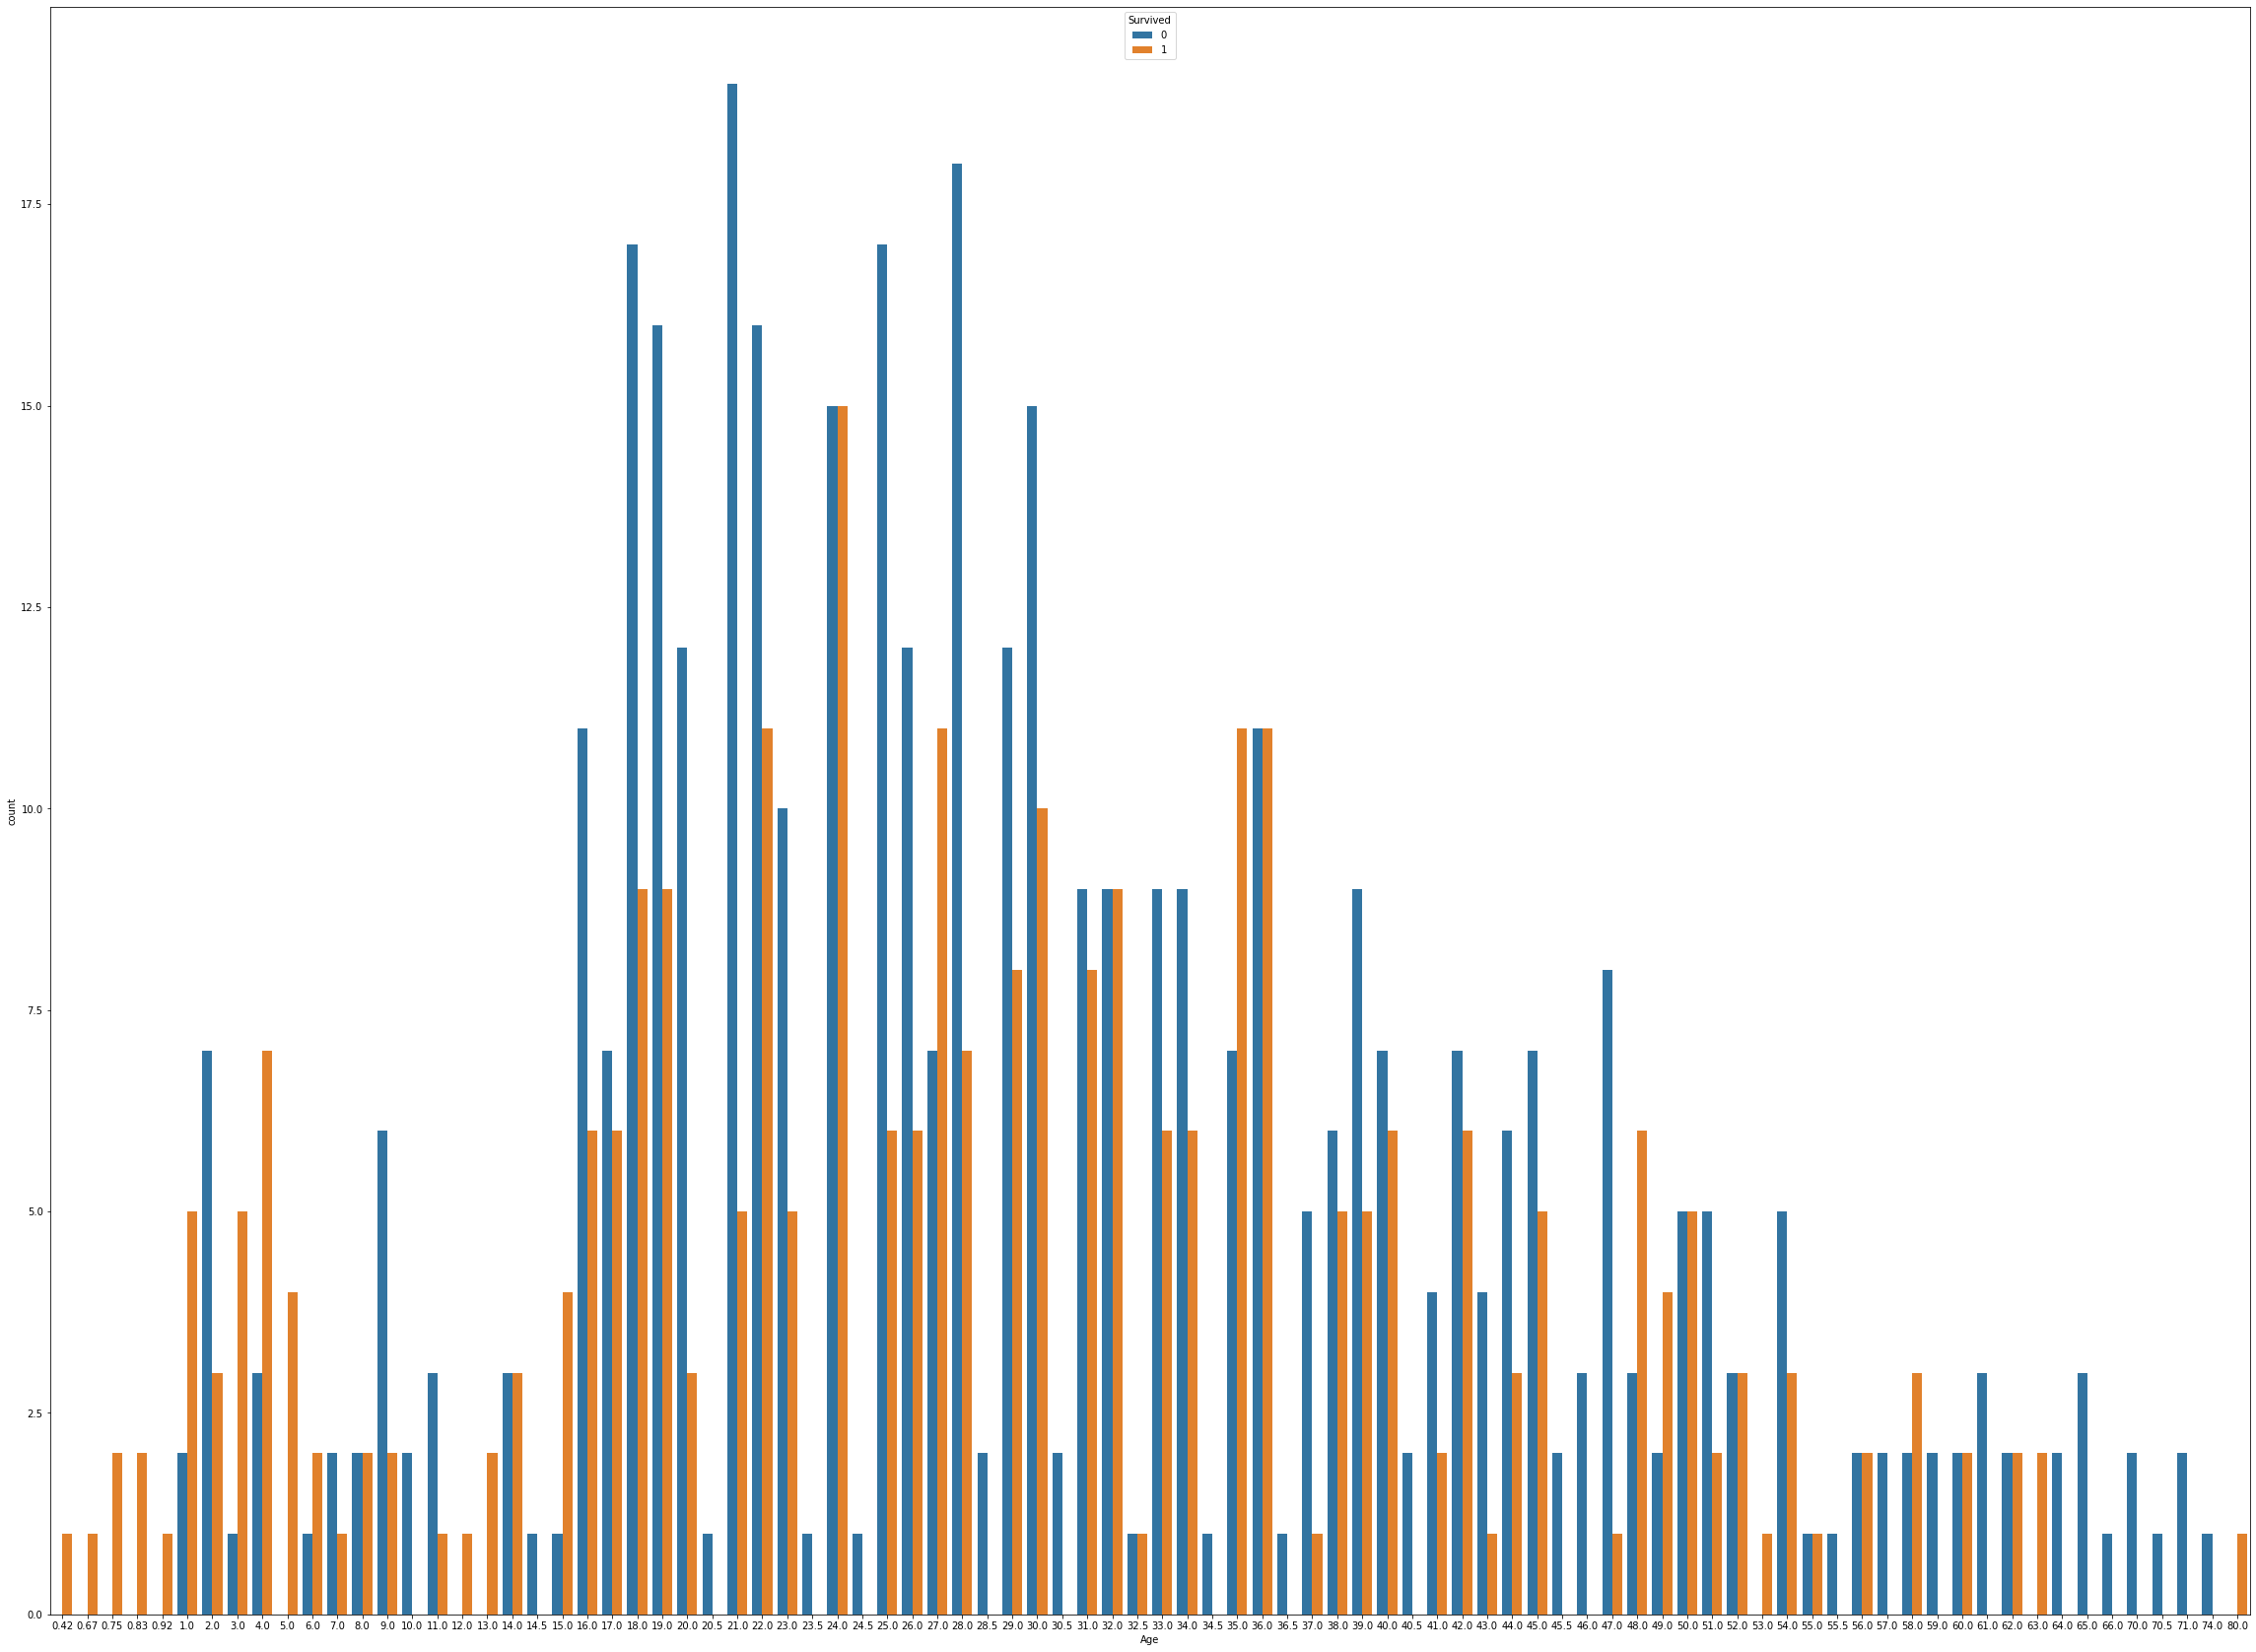

In [9]:
# Analyse and Plot for Age

plt.figure(figsize= (40, 30))

sns.countplot(x= 'Age', hue= 'Survived', data= df_training);

D:\Anaconda\envs\py36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\envs\py36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


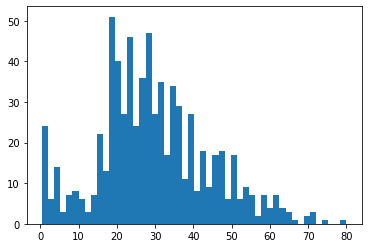

In [10]:
# Create Histogram

plt.hist(df_training['Age'], bins= 50);

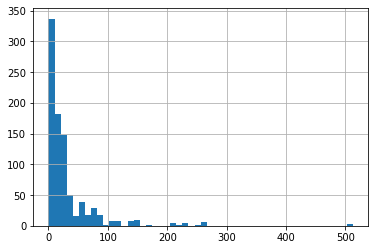

In [11]:
# Plot a Histogram for Fare Column

df_training['Fare'].hist(bins= 50);

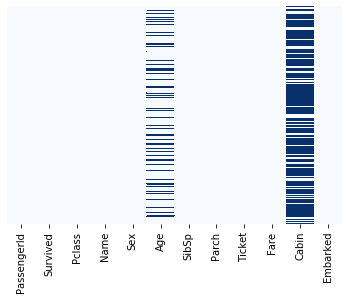

In [12]:
# Data Analysis

# Test for Missing Values

sns.heatmap(df_training.isnull(), yticklabels= False, cbar= False, cmap= 'Blues'); # Remove y Axis Labels and Progress bar heatmap
# We can See Age and Cabin has Missing Values

In [13]:
# Drop Cabin, PassengerID, Name, Embarked, Ticket Columns from the Dataset

df_training.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Embarked'], axis= 1, inplace= True) # Inplace Alters the Variable In-Memory

In [14]:
df_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [15]:
df_training.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [16]:
# Replace Nan Values of Age by Mean value of sex

# Function to Fill Age
def fillAge(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex is 'male':
            return df_training.groupby('Sex')['Age'].mean()[1]
        else:
            return df_training.groupby('Sex')['Age'].mean()[0]
    else:
        return age

In [17]:
# Apply function to replace NaN values in the Dataset

df_training["Age"] = df_training[ ['Age', 'Sex'] ].apply(fillAge, axis= 1)

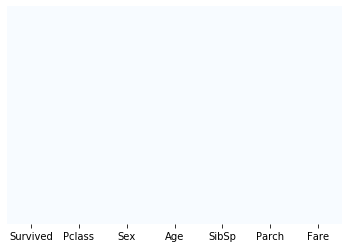

In [18]:
# Data Analysis

# Test for Missing Values

sns.heatmap(df_training.isnull(), yticklabels= False, cbar= False, cmap= 'Blues'); # Remove y Axis Labels and Progress bar heatmap
# All Null Elements are Replaced 

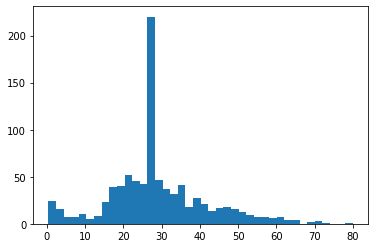

In [19]:
# Check for Ahe Histogram

plt.hist(df_training['Age'], bins= 40);

In [20]:
# Get Dummies for the 'Sex' column in Dataset

male = pd.get_dummies(df_training['Sex'], drop_first= False)
male.head() # We Fall into Dummy Variable Trap

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
# Get Dummies for the 'Sex' column in Dataset

male = pd.get_dummies(df_training['Sex'], drop_first= True)
male.head() # Male and Female Encoded as 1/0 in the Dataset

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# Append Male Column and drop sex

df_training.drop(['Sex'], axis= 1, inplace= True)

# Concatenate male with the Data
df_training = pd.concat([df_training, male], axis= 1)
df_training.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Model Building

In [23]:
# Segment X and y Data

X = df_training.drop('Survived', axis=1).values # Train X as Arrays
y = df_training['Survived'].values # Train y as Arrays

In [24]:
# Validation

X[:5], y[:5]

(array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
        [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
        [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
        [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ],
        [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ]]),
 array([0, 1, 1, 1, 0], dtype=int64))

In [25]:
# Importing Train Test Split

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 42)

In [27]:
# Import Logistic Regression library from the Dataset

from sklearn.linear_model import LogisticRegression

# Instantiate it
classifier = LogisticRegression(random_state= 42)

In [28]:
# Fit the Data

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicting the Results

y_predict = classifier.predict(X_test)
Y_predict_proba = classifier.predict_proba(X_test)

In [30]:
# Check for Predict proba

for i, j in zip(y_predict[:5], Y_predict_proba[:5]):
    print("The Probablity for Predicted class \"{}\" is this: {}".format(i, j))

The Probablity for Predicted class "0" is this: [0.91869965 0.08130035]
The Probablity for Predicted class "0" is this: [0.76299175 0.23700825]
The Probablity for Predicted class "0" is this: [0.8532819 0.1467181]
The Probablity for Predicted class "1" is this: [0.10163302 0.89836698]
The Probablity for Predicted class "1" is this: [0.32426256 0.67573744]


In [31]:
# Importing the Metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

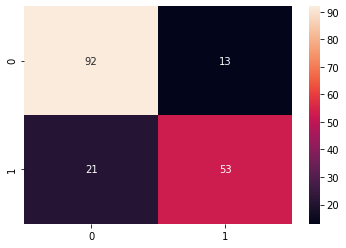

In [32]:
# Implement Confusion matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True, fmt= '.2g')

In [33]:
# get Classification Report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

